Name: Amit Shakarchy


Github link: https://github.com/amitshakarchy/big-data-analysis

# Homework Assignment 1
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

For this homework you will need to write code that analyzes real-world datasets. The code needs to be written in Python using the [sqlite3](https://docs.python.org/2/library/sqlite3.html) package. 

**Please note:** You need to answer only the questions that match your ID first digit.

# 1. Babies Names Dataset (35pt)

**Task 1 (for everyone):** Write a code that uses the  [**babies names dataset** ](https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv) (use NationalNames.csv) and creates a table named (Names) with the dataset data and the following columns: 'State', 'Gender', 'Name', 'Count' , and 'Year' (5pt)
**Bonus:** Load the data using a Batch INSERT SQL Query (2pt)

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aamitshakarchy","key":"004ade6e43f08b393cf10784d7e16ab0"}'}

In [ ]:
# !mkdir /root/.kaggle/
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Download the Babies names dataset

In [ ]:
# searching for the dataset
!kaggle datasets list -s baby

ref                                          title                              size  lastUpdated          downloadCount  
-------------------------------------------  --------------------------------  -----  -------------------  -------------  
kaggle/us-baby-names                         US Baby Names                     173MB  2017-11-21 22:18:15          24650  
ironicninja/baby-names                       Baby Names                          5MB  2021-02-09 16:21:40            202  
haezer/french-baby-names                     French Baby Names                  18MB  2020-04-07 16:32:38            256  
new-york-city/nyc-baby-names                 NYC Baby Names                    136KB  2017-09-08 20:04:20            676  
roopalik/amazon-baby-dataset                 Amazon baby dataset                18MB  2017-02-01 21:01:16            800  
samrat77/baby-names-dataset                  Baby Names DataSet                 85KB  2019-03-21 06:21:34            502  
fanbyprinciple/i

In [ ]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/us-baby-name

# download the dataset from Kaggle and unzip it
!kaggle datasets download kaggle/us-baby-names -f database.sqlite -p ./datasets/us-baby-name/database.sqlite
!chdir ./datasets/us-baby-name/database.sqlite/
!unzip ./datasets/us-baby-name/database.sqlite/*.zip  -d ./datasets/us-baby-name/database.sqlite

# download the NationalNames.csv file 
!kaggle datasets download kaggle/us-baby-names -f NationalNames.csv -p ./datasets/us-baby-name/NationalNames
!chdir ./datasets/us-baby-name/NationalNames/
!unzip ./datasets/us-baby-name/NationalNames/*.zip  -d ./datasets/us-baby-name/NationalNames

# download the StateNames.csv file 
!kaggle datasets download kaggle/us-baby-names -f StateNames.csv -p ./datasets/us-baby-name/StateNames
!chdir ./datasets/us-baby-name/StateNames/
!unzip ./datasets/us-baby-name/StateNames/*.zip  -d ./datasets/us-baby-name/StateNames

 94% 123M/131M [00:01<00:00, 97.1MB/s]
100% 131M/131M [00:01<00:00, 94.1MB/s]
/bin/bash: chdir: command not found
Archive:  ./datasets/us-baby-name/database.sqlite/database.sqlite.zip
  inflating: ./datasets/us-baby-name/database.sqlite/database.sqlite  
 44% 5.00M/11.5M [00:00<00:00, 37.9MB/s]
100% 11.5M/11.5M [00:00<00:00, 55.9MB/s]
/bin/bash: chdir: command not found
Archive:  ./datasets/us-baby-name/NationalNames/NationalNames.csv.zip
  inflating: ./datasets/us-baby-name/NationalNames/NationalNames.csv  
 56% 17.0M/30.5M [00:00<00:00, 57.3MB/s]
100% 30.5M/30.5M [00:00<00:00, 76.6MB/s]
/bin/bash: chdir: command not found
Archive:  ./datasets/us-baby-name/StateNames/StateNames.csv.zip
  inflating: ./datasets/us-baby-name/StateNames/StateNames.csv  


We downloaded an SQLite database into Colab. Let's connect to the dataset using the sqlite3 package

In [ ]:
import sqlite3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline
CSV_PATH = './datasets/us-baby-name/NationalNames/NationalNames.csv'
CSV_PATH_STATE_NAMES = './datasets/us-baby-name/StateNames/StateNames.csv'
DB_PATH = './datasets/us-baby-name/database.sqlite/database.sqlite'

In [ ]:
# load the CSV into a df
df = pd.read_csv(CSV_PATH_STATE_NAMES)
df.drop(columns=["Id"],inplace=True)
df = df.applymap(str)
df

,Name,Year,Gender,State,Count
0,Mary,1910,F,AK,14
1,Annie,1910,F,AK,12
2,Anna,1910,F,AK,10
3,Margaret,1910,F,AK,8
4,Helen,1910,F,AK,7
...,...,...,...,...,...
5647421,Seth,2014,M,WY,5
5647422,Spencer,2014,M,WY,5
5647423,Tyce,2014,M,WY,5
5647424,Victor,2014,M,WY,5


In [ ]:
# convert the data to match the bonus: Load the data using a Batch INSERT SQL Query (2pt) 
data_to_batch_insert = [tuple(df.iloc[ind]) for ind in df.index]

In [ ]:
data_to_batch_insert[:5]

[('Mary', '1910', 'F', 'AK', '14'),
 ('Annie', '1910', 'F', 'AK', '12'),
 ('Anna', '1910', 'F', 'AK', '10'),
 ('Margaret', '1910', 'F', 'AK', '8'),
 ('Helen', '1910', 'F', 'AK', '7')]

In [ ]:
# set create table query - create a table named (Names) with the dataset data and the following columns: 'State', 'Gender', 'Name', 'Count' , and 'Year' 
# There is no "state" column in NationalNames.csv
creat_table = """CREATE TABLE IF NOT EXISTS Names
             ([Name] text,
              [Year] integer,
              [Gender] text,
              [State] text,
              [Count] integer)"""

insert_table = """INSERT INTO Names(Name, Year, Gender, State, Count)
       values (?,?,?,?,?) """


In [ ]:
# connect to the database
conn = sqlite3.connect(DB_PATH) 
# create a cursor object
c = conn.cursor() 

# create "Names" table
c.execute(creat_table)

# insert data to db
c.executemany(insert_table, data_to_batch_insert)

# Senity check - select all data from the new table  
print(c.execute("SELECT count(*) FROM Names where Name=='Mary'").fetchall())


[(6371,)]


**Task 2 (for everyone):** Write a query that returns the statistics for the name Mary (5pt). Use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run (5pt). **Bonus:** [Create an index](https://www.w3schools.com/sql/sql_create_index.asp)  on the _Name_ column and use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run with the index (5pt)

In [ ]:
import timeit

query_mary = """SELECT count(*) FROM Names Where Name='Mary'"""
drop_index = """DROP INDEX IF EXISTS idx_name"""
create_index  = """CREATE INDEX IF NOT EXISTS idx_name ON Names (name);"""

def mary_query():
  starttime = timeit.default_timer()
  print("Number of Mary-s :", c.execute(query_mary).fetchone()[0])
  print("The time taken is :", timeit.default_timer() - starttime)


# Run without index on the Name column
# print("The time taken is ",timeit.timeit(stmt=code_for_timeit,setup= "import sqlite3;conn = sqlite3.connect(DB_PATH) ; c = conn.cursor()"))
c.execute(drop_index) # in case we run it again
mary_query()

# Bonus: Create an index on the Name column and use the timeit package to measure the time it takes the query to run with the index 
c.execute(create_index)
print("With index :")
mary_query()


Number of Mary-s : 6371
The time taken is : 0.4946333909999794
With index :
Number of Mary-s : 6371
The time taken is : 0.001105407000068226


### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 4 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code 
your_id  = "313278889"
q = int(your_id) % 4 + 1
print("You need to answer question number %s" % q)

You need to answer question number 2


***Question 1:*** Write a function that returns how many babies were born in a given state in a given year.
Use it to calculate the number of babies born in TX in 1986 (10pt)

***Question 2:*** Write a function that returns how many female babies were born between a given range of years.
Use it to calculate how many babies were born between 1988 and 1995  (10pt)

In [ ]:
def female_babies(first_year, last_year):
  query_babies = f"""SELECT COUNT(*) from Names
                    WHERE Gender='F' AND 
                    Year BETWEEN {first_year} AND {last_year}
                     """
  res = c.execute(query_babies).fetchone()[0]
  return res
print(female_babies(1988, 1995))

313410


In [ ]:
# df[(df["Year"].astype(int)>=1988) & (df["Year"].astype(int)<=1995) & (df["Gender"]=="F")]

**Question 3:** Write a function that returns the most common female name in a given state. Use it to calculate the most common female name in Wasington in 1987 (10pt)

**Question 4:** Write a function that returns how many male babies named _Robert where born in a given state in a given year. Use it to find the state in which the highest number of babies _Robert_ where born in 2010 (10pt)

**Question (for everyone):** For the state of CA write code that calculates the second most popular female/male names in each decade (10pt). **Bonus**: Visualize it somehow using Matplotlib (5pt)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np

def most_popular(gender, state="CA"):
  df = pd.DataFrame()
  for decade in range(1910, 2020, 10):


    query = f"""SELECT Name, count(Name) AS visits_name 
              FROM Names
              WHERE gender = '{gender}' and Year>={decade} and Year<{decade}+10
              GROUP BY Name
              ORDER BY visits_name DESC Limit 2;"""
    
    print(c.execute(query).fetchall())

    tup = c.execute(query).fetchall()[1]
    df2 = {'Name': tup[0], 'Count': tup[1], 'decade': decade}
    df = df.append(df2, ignore_index = True)
  return df
  
w_df = most_popular(gender="M")

[('George', 510), ('John', 510)]
[('George', 510), ('James', 510)]
[('David', 510), ('Donald', 510)]
[('Charles', 510), ('David', 510)]
[('Alan', 510), ('Anthony', 510)]
[('Anthony', 510), ('Brian', 510)]
[('Aaron', 510), ('Adam', 510)]
[('Aaron', 510), ('Adam', 510)]
[('Aaron', 510), ('Adam', 510)]
[('Alex', 510), ('Alexander', 510)]
[('Aiden', 255), ('Alexander', 255)]


In [ ]:
w_df

,Count,Name,decade
0,510.0,John,1910.0
1,510.0,James,1920.0
2,510.0,Donald,1930.0
3,510.0,David,1940.0
4,510.0,Anthony,1950.0
5,510.0,Brian,1960.0
6,510.0,Adam,1970.0
7,510.0,Adam,1980.0
8,510.0,Adam,1990.0
9,510.0,Alexander,2000.0


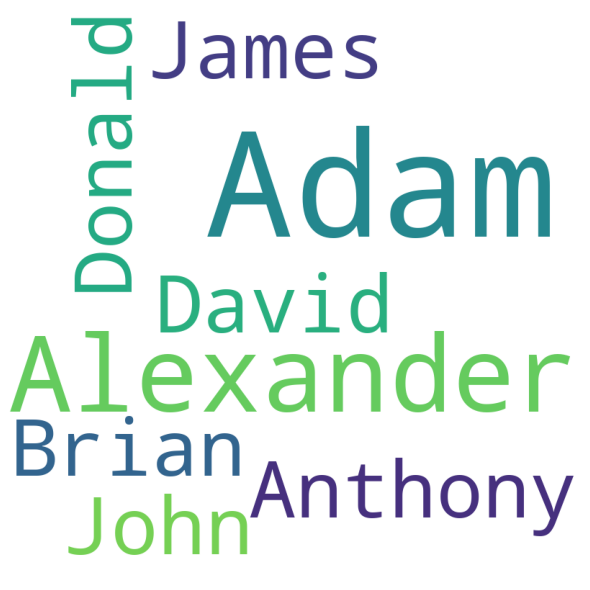

In [ ]:
names = list(w_df["Name"])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(', '.join(names))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


# 2. Flavors of Cacao Dataset (15pt)

Using the [Flavors of Cacao](https://www.kaggle.com/rombikuboktaeder/choco-flavors) dataset, answer the following questions:

In [ ]:
# download the flavors_of_cacao.csv file 

!kaggle datasets list -s choco_flavors
!kaggle datasets download rombikuboktaeder/choco-flavors -p ./datasets/choco-flavors/
!unzip ./datasets/choco-flavors/choco-flavors.zip -d ./datasets/choco-flavors/

ref                             title          size  lastUpdated          downloadCount  
------------------------------  -------------  ----  -------------------  -------------  
rombikuboktaeder/choco-flavors  choco_flavors  30KB  2018-04-01 04:36:29           1428  
  0% 0.00/30.3k [00:00<?, ?B/s]
100% 30.3k/30.3k [00:00<00:00, 50.7MB/s]
Archive:  ./datasets/choco-flavors/choco-flavors.zip
  inflating: ./datasets/choco-flavors/flavors_of_cacao.csv  


In [ ]:
# load the CSV into a df
CACAO_CSV_PATH  = '/content/datasets/choco-flavors/flavors_of_cacao.csv'
df = pd.read_csv(CACAO_CSV_PATH)


In [ ]:
df = df.replace(np.nan, '', regex=True)
df.isnull().values.any()

False

In [ ]:
df['Cocoa\nPercent']=df['Cocoa\nPercent'].str.replace('%','')
df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62,Austria,3.25,,India


In [ ]:
!pip install pony # we need to use pony ORM to creaet the dataset

     |████████████████████████████████| 290 kB 5.2 MB/s 
  Created wheel for pony: filename=pony-0.7.14-py3-none-any.whl size=351293 sha256=130db801401002125b536a9a8426fd619f9f9199c1e52f4247efdd12774ce81e
  Stored in directory: /root/.cache/pip/wheels/de/7a/8b/82a3b5a0135fc6bad188f62e1bf6c4843142bc22c144879014
Successfully built pony


In [ ]:
from pony.orm import *
# Create a new database
db = Database()
db.bind(provider='sqlite', filename='/content/datasets/choco-flavors/choco-flavors.pony.db', create_db=True)



In [ ]:
class ChocoFlavor(db.Entity):
    Company = Optional(str)
    Origin = Required(str)
    REF = Required(int)
    ReviewDate = Required(int)
    CocoaPrecent = Required(float)
    CompanyLocation = Required(str)
    Rating = Required(float)
    BeanType = Optional(str, default='')
    BroadBeanOrigin = Optional(str, default='')
     
# create tables
db.generate_mapping(create_tables=True) 

# insert data into the db

for idx, row in df.iterrows():
    print(row)
    ChocoFlavor(
            Company=row['Company\xa0\n(Maker-if known)'],
            Origin=row['Specific Bean Origin\nor Bar Name'],
            REF=row['REF'],
            ReviewDate=row['Review\nDate'],
            CocoaPrecent=row['Cocoa\nPercent'],
            CompanyLocation=row['Company\nLocation'],
            Rating=row['Rating'],
            BeanType=row['Bean\nType'],
            BroadBeanOrigin=row['Broad Bean\nOrigin']
    )

show(ChocoFlavor)
commit()

Streaming output truncated to the last 5000 lines.
Specific Bean Origin\nor Bar Name         Tenor
REF                                        1506
Review\nDate                               2015
Cocoa\nPercent                               62
Company\nLocation                        U.S.A.
Rating                                      2.5
Bean\nType                                     
Broad Bean\nOrigin                    Nicaragua
Name: 1296, dtype: object
Company \n(Maker-if known)           Pitch Dark
Specific Bean Origin\nor Bar Name          Johe
REF                                        1506
Review\nDate                               2015
Cocoa\nPercent                               80
Company\nLocation                        U.S.A.
Rating                                     2.75
Bean\nType                                     
Broad Bean\nOrigin                    Nicaragua
Name: 1297, dtype: object
Company \n(Maker-if known)                    Pitch Dark
Specific Bean Origin\nor

**Question 1:** Write a function that returns the number of bars manufactured where the bars' BroadBean Origin is a given country. Use the function to calculate the number of bars where BroadBean Origin is 'Fiji' (15pt)

In [ ]:
def get_bars_num(b_b_origin):
  return list(select((count(c)) for c in ChocoFlavor if c.BroadBeanOrigin==b_b_origin))[0]
  
get_bars_num('Fiji')

8

**Question 2:** Write a function that returns the maximal and average cocoa percentage in a bar manufactured by a company in a specific country. Use the function to calculate the minimal and average cocoa percentage in bars manufactured by a Swiss company (15pt).

In [ ]:
def max_avg_c_precentage(country):
  # The avg, max of cocoa percentage for each company in the given country
  return list(select((max(c.CocoaPrecent), avg(c.CocoaPrecent)) for c in ChocoFlavor if c.CompanyLocation==country) )[0]

(max, avg) = max_avg_c_precentage("Switzerland")
print("max = ", max)
print("avg = ", avg)

max =  88.0
avg =  71.21052631578948


**Question 3:** Calculate the second most common bean type(s) and the most rare bean type(s) (15
pt)

In [ ]:
# second most common bean type(s):
most_common = select((c.BeanType, count(c)) for c in ChocoFlavor).sort_by(lambda x,y: desc(y))
second_most_common_num = most_common.limit(2)[1][1]
second_most_common =  list(select((c.BeanType, count(c)) for c in ChocoFlavor if count(c)==second_most_common_num))
print("second_most_common: ",second_most_common)

# the most rare bean type(s):
rare = select((c.BeanType, count(c)) for c in ChocoFlavor).sort_by(lambda x,y: y)
rare_num = rare.limit(1)[0][1]
most_rare =  list(select((c.BeanType, count(c)) for c in ChocoFlavor if count(c)==rare_num))
print("most_rare: ",most_rare)

second_most_common:  [('Trinitario', 419)]
most_rare:  [('Amazon', 1), ('Blend-Forastero,Criollo', 1), ('CCN51', 1), ('Criollo (Ocumare 67)', 1), ('Criollo (Ocumare 77)', 1), ('Criollo (Ocumare)', 1), ('Criollo (Wild)', 1), ('Criollo, +', 1), ('Forastero (Amelonado)', 1), ('Forastero (Arriba) ASSS', 1), ('Forastero(Arriba, CCN)', 1), ('Forastero, Trinitario', 1), ('Trinitario (Amelonado)', 1), ('Trinitario (Scavina)', 1), ('Trinitario, Nacional', 1), ('Trinitario, TCGA', 1)]


**Question 4:** Calculate the number of reviews and the average rating in each year. Calculate the number of reviews and the average rating of each company in each year (15pt)

In [ ]:
# Calculate the number of reviews and the average rating in each year
years = list(select(c.ReviewDate for c in ChocoFlavor))
for year in years:
  lst = list(select((avg(c.Rating), count(c.ReviewDate)) for c in ChocoFlavor if  c.ReviewDate==year ))
  print(f"year: {year}, number of reviews: {lst[0][1]}, avg rating: {lst[0][0]}")


year: 2016, number of reviews: 1, avg rating: 3.2260273972602738
year: 2015, number of reviews: 1, avg rating: 3.2464912280701754
year: 2014, number of reviews: 1, avg rating: 3.1892712550607287
year: 2013, number of reviews: 1, avg rating: 3.1970108695652173
year: 2012, number of reviews: 1, avg rating: 3.178205128205128
year: 2011, number of reviews: 1, avg rating: 3.256060606060606
year: 2009, number of reviews: 1, avg rating: 3.073170731707317
year: 2010, number of reviews: 1, avg rating: 3.1486486486486487
year: 2017, number of reviews: 1, avg rating: 3.3125
year: 2008, number of reviews: 1, avg rating: 2.9946236559139785
year: 2007, number of reviews: 1, avg rating: 3.1623376623376624
year: 2006, number of reviews: 1, avg rating: 3.125


# 3. Kickstarter Projects Dataset (25pt)

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv), answer the following questions:

**Task 1 (for everyone):** Load the dataset to SQLite DB using [PonyORM](https://ponyorm.org) (10pt)

In [ ]:
# download the flavors_of_cacao.csv file 

!kaggle datasets list -s kickstarter-projects
!kaggle datasets download kemical/kickstarter-projects -p ./datasets/kickstarter-projects/
!unzip ./datasets/kickstarter-projects/kickstarter-projects.zip -d ./datasets/kickstarter-projects/

ref                                                     title                                        size  lastUpdated          downloadCount  
------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  
kemical/kickstarter-projects                            Kickstarter Projects                         37MB  2018-02-08 09:02:30          57145  
codename007/funding-successful-projects                 Funding Successful Projects on Kickstarter   20MB  2017-06-20 17:37:38           2997  
socathie/kickstarter-project-statistics                 Kickstarter Project Statistics                1MB  2019-11-14 06:38:31           6187  
toshimelonhead/400000-kickstarter-projects              400,000 Kickstarter Projects                   0B  2019-07-23 01:23:31            339  
yashkantharia/kickstarter-campaigns                     Kickstarter Campaigns                        12MB  2019-03-03 13:46:08          

In [ ]:
# load the CSV into a df
KICK_CSV_PATH  = '/content/datasets/kickstarter-projects/ks-projects-201801.csv'
kick_df = pd.read_csv(KICK_CSV_PATH, encoding = "ISO-8859-1")
kick_df.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
kick_df = kick_df.replace(np.nan, '', regex=True)
kick_df.isnull().values.any()



False

In [ ]:
# Create a new database
kick_db = Database()
kick_db.bind(provider='sqlite', filename='/content/datasets/kickstarter-projects/kickstarter-project.pony.db', create_db=True)

class KickstarterProject(kick_db.Entity):
    name = Optional(str) 
    category = Required(str)
    main_category = Required(str)
    currency = Required(str)
    deadline = Required(str)
    goal = Required(float)
    launched = Required(str)
    pledged = Required(float)
    launched = Required(str)
    state = Required(str)
    backers = Required(int)
    country = Required(str)
    usd_pledged = Optional(float)
    usd_pledged_real = Required(float)
    usd_goal_real = Required(float)

show(KickstarterProject)
kick_db.generate_mapping(create_tables=True)

class KickstarterProject(Entity):
    id = PrimaryKey(int, auto=True)
    name = Optional(str, default='')
    category = Required(str)
    main_category = Required(str)
    currency = Required(str)
    deadline = Required(str)
    goal = Required(float)
    pledged = Required(float)
    launched = Required(str)
    state = Required(str)
    backers = Required(int)
    country = Required(str)
    usd_pledged = Optional(float)
    usd_pledged_real = Required(float)
    usd_goal_real = Required(float)


In [ ]:
for idx, row in kick_df.iterrows():
    KickstarterProject(
            name=row['name'],
            category=row['category'],
            main_category=row['main_category'],
            currency=row['currency'],
            deadline=row['deadline'],
            goal=row['goal'],
            launched=row['launched'],
            pledged=row['pledged'],
            state=row['state'],
            backers=row['backers'],
            country=row['country'],
            usd_pledged=(row['usd pledged'] if type(row['usd pledged']) is float else 0.0) ,
            usd_pledged_real=row['usd_pledged_real'],
            usd_goal_real=row['usd_goal_real'],
    )
commit()

### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code 
your_id  = "313278889"
q = int(your_id) % 3 + 1
print("You need to answer question number %s" % q)

You need to answer question number 2


**Question 1:** On average which project category received the highest number of backers? (15 pt)

**Question 2:** On average which project category received the highest pledged USD? (15 pt)

In [ ]:
 proj_cat = list(select((p.category, avg(p.usd_pledged)) for p in KickstarterProject).sort_by(lambda x,y: desc(y)))[0][0]
 print(f"{proj_cat} project category received the highest pledged USD")

3D Printing project category received the highest pledged USD


**Question 3:** In which month occurred the highest number of projects? (15 pt)

## 4. Oscars Datasets (10pt)

Using the [Oscars Dataset](https://www.kaggle.com/theacademy/academy-awards), please answer only one of the following questions (you can chose):

In [ ]:
# download the oscars.csv file 

!kaggle datasets list -s academy-awards

!kaggle datasets download theacademy/academy-awards  -p ./datasets/academy-awards/
!unzip ./datasets/academy-awards/academy-awards.zip -d ./datasets/academy-awards/


ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
theacademy/academy-awards                                   The Academy Awards, 1927-2015                       185KB  2017-02-13 17:30:48           6295  
fmejia21/demographics-of-academy-awards-oscars-winners      Demographics of Academy Awards (Oscars) Winners      20KB  2020-02-04 17:38:26           3874  
unanimad/the-oscar-award                                    The Oscar Award, 1927 - 2020                        191KB  2020-02-19 15:45:30           2913  
unanimad/golden-globe-awards                                Golden Globe Awards, 1944 - 2020                    117KB  2020-01-06 16:19:01           2432  
dharmikdonga/academy-awards-dataset-oscars                  Acad

In [ ]:
# load the CSV into a df
oscar_CSV_PATH  = '/content/datasets/academy-awards/database.csv'
oscar_df = pd.read_csv(oscar_CSV_PATH, encoding = "ISO-8859-1")
oscar_df.head(5)

,Year,Ceremony,Award,Winner,Name,Film
0,1927/1928,1,Actor,NaN,Richard Barthelmess,The Noose
1,1927/1928,1,Actor,1.0,Emil Jannings,The Last Command
2,1927/1928,1,Actress,NaN,Louise Dresser,A Ship Comes In
3,1927/1928,1,Actress,1.0,Janet Gaynor,7th Heaven
4,1927/1928,1,Actress,NaN,Gloria Swanson,Sadie Thompson


In [ ]:
oscar_df["Winner"].fillna(0.0, inplace=True)
oscar_df["Film"].fillna("", inplace=True)

oscar_df.isnull().values.any()

False

In [ ]:
# Create a new database
oscar_db = Database()
oscar_db.bind(provider='sqlite', filename='/content/datasets/academy-awards/academy-awards.pony.db', create_db=True)

class AcademyAwards(oscar_db.Entity):
    year = Optional(str) 
    ceremony = Required(int)
    award = Required(str)
    winner = Required(float)
    name = Required(str)
    film = Optional(str)
show(AcademyAwards)
oscar_db.generate_mapping(create_tables=True)

class AcademyAwards(Entity):
    id = PrimaryKey(int, auto=True)
    year = Optional(str, default='')
    ceremony = Required(int)
    award = Required(str)
    winner = Required(float)
    name = Required(str)
    film = Optional(str, default='')


In [ ]:
for idx, row in oscar_df.iterrows():
    AcademyAwards(
            year=row['Year'],
            ceremony=row['Ceremony'],
            award=row['Award'],
            winner=row['Winner'],
            name=row['Name'],
            film=row['Film'],
    )
commit()

**Question 1:** Who is the male actress with the most Oscar nominees? (10pt)

In [ ]:
most_nominees = list(select((a.name, count(a.year)) for a in AcademyAwards if a.award=="Actor").sort_by(lambda x,y: desc(y)))[0]
print(f"male actress with the most Oscar nominees is {most_nominees[0]} with {most_nominees[1]} nominees ")

male actress with the most Oscar nominees is Spencer Tracy with 9 nominees 


**Question 2:** Who is the female director with the most Oscar nominees? (10pt)

**Question 3:** Which top-10 movies received the highest number of Oscar nominees? (10pt)

**Question 4:** Write a function that receives an actor's name and returns the actor’s number of Oscar nominees. Use the function to calculate the number of times Leonardo DiCaprio was a nominee (10pt)

## 5. Select a Dataset (15pt)



```
# This is formatted as code
```

**Open Question:** Select an interesting dataset and use SQL to discover something interesting (15pt). **Bonus:** Use BigQuery (2pt)

In [ ]:
# download the heart-failure.csv file 

!kaggle datasets list -s heart-failure-prediction

!kaggle datasets download andrewmvd/heart-failure-clinical-data  -p ./datasets/heart-failure-clinical-data/
!unzip ./datasets/heart-failure-clinical-data/heart-failure-clinical-data.zip -d ./datasets/heart-failure-clinical-datas/

ref                                                          title                                             size  lastUpdated          downloadCount  
-----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
andrewmvd/heart-failure-clinical-data                        Heart Failure Prediction                           4KB  2020-06-20 01:03:20          62345  
fedesoriano/heart-failure-prediction                         Heart Failure Prediction Dataset                   9KB  2021-09-10 18:11:57           7990  
fedesoriano/stroke-prediction-dataset                        Stroke Prediction Dataset                         67KB  2021-01-26 19:29:28          48770  
uciml/aps-failure-at-scania-trucks-data-set                   Air pressure system failures in Scania trucks    36MB  2018-02-19 15:38:09           4651  
fdic/bank-failures                                           Commercial Bank

In [ ]:
# load the CSV into a df
heart_csv_path = "./datasets/heart-failure-clinical-datas/heart_failure_clinical_records_dataset.csv"
h_df = pd.read_csv(heart_csv_path, encoding = "ISO-8859-1")
h_df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
oscar_df.isnull().values.any()

False

In [104]:
# Create a new database
h_db = Database()
h_db.bind(provider='sqlite', filename='/content/datasets/heart-failure-clinical-datas/heart_failure_clinical_records.pony.db', create_db=True)

class HeartFailure(h_db.Entity):
    age=Required(float)
    anaemia=Optional(float)
    creatinine_phosphokinase=Optional(float)
    diabetes=Optional(float)
    ejection_fraction=Optional(float)
    high_blood_pressure=Optional(float)
    platelets=Optional(float)
    serum_creatinine=Optional(float)
    serum_sodium=Optional(float)
    sex=Optional(float)
    smoking=Optional(float)
    time=Optional(float)
    DEATH_EVENT=Optional(float)
show(HeartFailure)
h_db.generate_mapping(create_tables=True)

class HeartFailure(Entity):
    id = PrimaryKey(int, auto=True)
    age = Required(float)
    anaemia = Optional(float)
    creatinine_phosphokinase = Optional(float)
    diabetes = Optional(float)
    ejection_fraction = Optional(float)
    high_blood_pressure = Optional(float)
    platelets = Optional(float)
    serum_creatinine = Optional(float)
    serum_sodium = Optional(float)
    sex = Optional(float)
    smoking = Optional(float)
    time = Optional(float)
    DEATH_EVENT = Optional(float)


In [105]:
for idx, row in h_df.iterrows():
    HeartFailure(
            age=row["age"],
            anaemia=row["anaemia"],
            creatinine_phosphokinase=row["creatinine_phosphokinase"],
            diabetes=row["diabetes"],
            ejection_fraction=row["ejection_fraction"],
            high_blood_pressure=row["high_blood_pressure"],
            platelets=row["platelets"],
            serum_creatinine=row["serum_creatinine"],
            serum_sodium=row["serum_sodium"],
            sex=row["sex"],
            smoking=row["smoking"],
            time=row["time"],
            DEATH_EVENT=row["DEATH_EVENT"],
    )
commit()


I would like to compare the effect of smoking on heart failures, between males and females. The following results suggest thet for males, one of the most effective causes for herat failure might be smoking. On the other hand, we cannot say the same when it comes to females.

In [110]:
# discover something interesting: 
dead_male_smoke = list(select(count(m) for m in HeartFailure if m.sex==1 and m.DEATH_EVENT==1 and m.smoking==1))[0]
dead_male_clean = list(select(count(m) for m in HeartFailure if m.sex==1 and m.DEATH_EVENT==1 and m.smoking==0))[0]

dead_female_smoke = list(select(count(f) for f in HeartFailure if f.sex==0 and f.DEATH_EVENT==1 and f.smoking==1))[0]
dead_female_clean = list(select(count(f) for f in HeartFailure if f.sex==0 and f.DEATH_EVENT==1 and f.smoking==0))[0]


print(f"Ratio of smoking: non-smoking females that died due to a heart failure: {dead_female_smoke}:{dead_female_clean}")
print(f"Ratio of smoking: non-smoking males that died due to a heart failure: {dead_male_smoke}:{dead_male_clean}")

Ratio of smoking: non-smoking females that died due to a heart failure: 3:31
Ratio of smoking: non-smoking males that died due to a heart failure: 27:35
